In [31]:
import os

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('iris.data.csv')

In [34]:
# Showcase the end of the DataFrame to validate data integrity
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [35]:
from matplotlib import pyplot as plt

In [36]:
import numpy as np

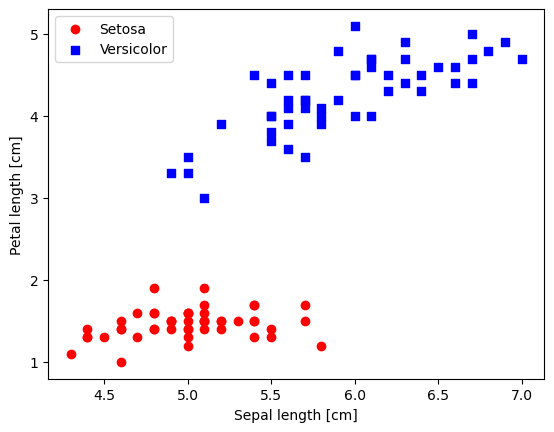

In [37]:
# Extract the first 100 class labels that correspond to the 50
# Iris-setosa and 50 Iris-versicolor flowers
# And convert the class labels into two integer class labels,
# 1 (versicolor) and 0 (setosa), that we assign to a vector, y,
# where the values method of a pandas DataFrame yields the 
# corresponding NumpPy representation.

# Similarily, we extract the first feature column (sepal length)
# and the third feature column (petal length) of those 100 training
# examples and assign them to a feature matrix, X, which we can
# visualize via a two-dimensional scatterplot:

# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
# pandas.DataFrame.iloc[] is primarily integer position based 
# (from 0 to length-1 of the axis), but may also be used with 
# a boolean array.

# See https://www.w3schools.com/python/numpy/numpy_array_slicing.asp
# the argument passed into the iloc property selects the value from
# the 5th column of the first 100 rows
# Meaning we get a collection of strings containing 50 values of
# 'Iris-setosa' and 50 values of 'Iris-versicolor'
# Contrary to the book, the dataset I downloaded only had 49 
# of each flower, hence up to and not including 99:
y = df.iloc[:99, 4].values

# See https://www.geeksforgeeks.org/numpy-where-in-python/
# Sets the y-variable to contain a collection of 0's and 1's.
# All of the values in the preceding collection satisfying the 
# condition in the first parameter of the argument, will be set to
# 0. Otherwise they will be set to 1.
y = np.where(y == 'Iris-setosa', 0, 1)

# Extract sepal length and petal length
# By selecting the values from the first and third column
# in the first 98 rows
X = df.iloc[:99, [0, 2]].values
# X is now a two-dimensional array

# See https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
# Plot the data by selecting both values from the first 49 arrays
plt.scatter(X[:49, 0], X[:49, 1],
            color='red', marker='o', label='Setosa')
# Do the same for Versicolor, but this time arrays from and
# including 50 to the end of the collection
plt.scatter(X[49:, 0], X[49:, 1],
            color='blue', marker='s', label='Versicolor')
# Put some informative information on the scatter plot
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [38]:
# See https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
# Load the autoreload module from IPython
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# Configue autoreload to reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
%autoreload 2

In [40]:
# Import the perceptron.py file that I wrote
import perceptron

In [41]:
# Training of perceptron algorithm on the extracted Iris data subset.
# Plot the misclassification error for each epoch to check whether
# the algorithm converged and found a decision boundary that
# seperates the two Iris flower classes:
ppn = perceptron.Perceptron(eta=0.01, n_iter=10)

In [42]:
ppn.fit(X, y)

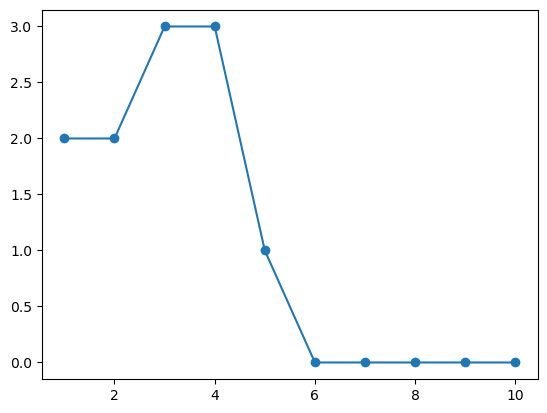

In [43]:
# See the plot function from pyplot: https://www.geeksforgeeks.org/matplotlib-pyplot-plot-function-in-python/
# See the range function in Python: https://www.w3schools.com/python/ref_func_range.asp
# Short description of the range function: The range() function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), 
# and stops before a specified number. Syntax: range(start, stop, step)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')